In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sns.set_palette("husl"); plt.style.use('seaborn-v0_8')

In [2]:
RAW = r"E:/Bigteam/Project/Trendyol-Datathon-2025/raw_data/"
train    = pd.read_parquet(RAW + "train_data.parquet")
users    = pd.read_parquet(RAW + "user_data.parquet")
products = pd.read_parquet(RAW + "product_data.parquet")

print(f"Train:   {train.shape}")
print(f"Users:   {users.shape}")
print(f"Products:{products.shape}")
train.head()

Train:   (2773805, 9)
Users:   (38392, 4)
Products:(648331, 4)


,ts_hour,search_term_normalized,clicked,ordered,added_to_cart,added_to_fav,user_id_hashed,content_id_hashed,session_id
0,2025-07-10 17:00:00+00:00,a_elbise_kesim,1,0,0,0,1be4d2dad45a5e01,ae9b536d26e602f4,train_4fd3705b497bbe4f
1,2025-07-10 17:00:00+00:00,a_elbise_kesim,0,0,0,0,1be4d2dad45a5e01,91b8a11e4c8e0ded,train_4fd3705b497bbe4f
2,2025-07-10 17:00:00+00:00,a_elbise_kesim,0,0,0,0,1be4d2dad45a5e01,1a78e29f4bcc58b0,train_4fd3705b497bbe4f
3,2025-07-10 17:00:00+00:00,a_elbise_kesim,0,0,0,0,1be4d2dad45a5e01,604a4c8b13d798a4,train_4fd3705b497bbe4f
4,2025-07-10 17:00:00+00:00,a_elbise_kesim,0,0,0,0,1be4d2dad45a5e01,038680d15f693ae2,train_4fd3705b497bbe4f


In [3]:
def info(df, name):
    print(f"\n=== {name} ===")
    display(df.info(memory_usage='deep'))
    display(df.isnull().sum().loc[lambda s: s>0])

info(train,    "TRAIN")
info(users,    "USERS")
info(products, "PRODUCTS")


=== TRAIN ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773805 entries, 0 to 2773804
Data columns (total 9 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   ts_hour                 datetime64[us, UTC]
 1   search_term_normalized  object             
 2   clicked                 int64              
 3   ordered                 int64              
 4   added_to_cart           int64              
 5   added_to_fav            int64              
 6   user_id_hashed          object             
 7   content_id_hashed       object             
 8   session_id              object             
dtypes: datetime64[us, UTC](1), int64(4), object(4)
memory usage: 796.2 MB


None

Series([], dtype: int64)


=== USERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38392 entries, 0 to 38391
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_gender          38392 non-null  object 
 1   user_birth_year      15572 non-null  float64
 2   user_tenure_in_days  38392 non-null  int64  
 3   user_id_hashed       38392 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0 MB


None

user_birth_year    22820
dtype: int64


=== PRODUCTS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648331 entries, 0 to 648330
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   ts_hour                  648331 non-null  datetime64[us, UTC]
 1   search_term_normalized   648331 non-null  object             
 2   total_search_impression  648331 non-null  float64            
 3   total_search_click       648331 non-null  float64            
dtypes: datetime64[us, UTC](1), float64(2), object(1)
memory usage: 53.7 MB


None

Series([], dtype: int64)

In [4]:
total     = len(train)
clicks    = train['clicked'].sum()
orders    = train['ordered'].sum()

print(f"Tıklama oranı  : {clicks/total:.2%}")
print(f"Satın alma oranı: {orders/total:.2%}")
if clicks:
    print(f"Dönüşüm oranı  : {orders/clicks:.2%}")

Tıklama oranı  : 3.58%
Satın alma oranı: 0.31%
Dönüşüm oranı  : 8.60%


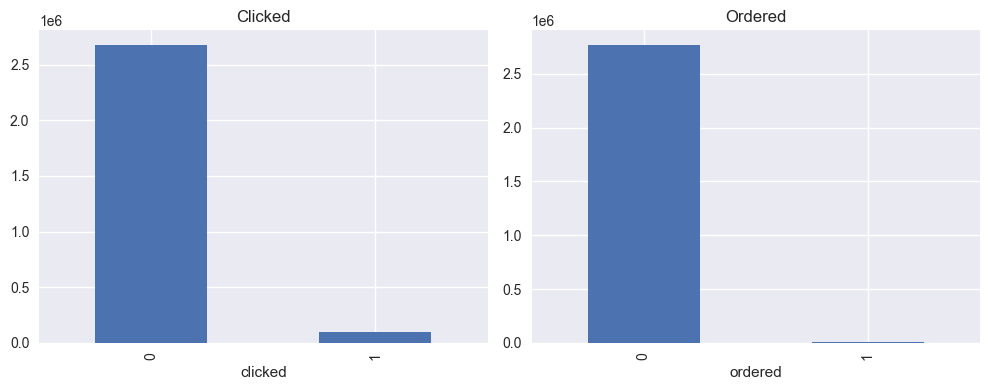

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
train['clicked'].value_counts().plot(kind='bar', ax=ax[0], title='Clicked')
train['ordered'].value_counts().plot(kind='bar', ax=ax[1], title='Ordered')
plt.tight_layout(); plt.show()